In [1]:
install.packages('NMF')
library(NMF)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: registry

Loading required package: rngtools

Loading required package: cluster

NMF - BioConductor layer [OK] | Shared memory capabilities [NO: bigmemory] | Cores 2/2

  To enable shared memory capabilities, try: install.extras('
NMF
')



In [2]:
data <- read.table("DNAacCPM.tsv", header = TRUE, sep = "\t", row.names = 1)
head(data)

,D00,D04,D07,ENP1,ENP2,ENP3,ENP.Alpha,PP1_2,SC.Alpha_D22,SC.Alpha,SC.Beta,SC.Delta,SC.EC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:9837-10430,60.1169636,47.512042,36.513989,23.3103519,25.4898410,47.045878,15.571383,51.06999,534.263652,19.117123,185.9242830,0.9256117,5.7022433
chr1:17345-17626,1.3462763,15.262441,2.961958,3.0704387,8.0155951,18.737143,9.436199,20.05774,16.098847,1.198621,4.4489666,0.2397652,45.6635600
chr1:28431-29829,16.4810402,13.124451,13.666617,146.1233921,5.6543603,97.818373,10.366851,36.40663,67.330999,22.083062,43.8988407,3.2526072,21.4651292
chr1:99034-99327,0.6691837,4.102695,3.794708,0.6707853,0.5993106,2.446932,2.637417,36.53085,1.884787,2.774989,0.7404894,0.0000000,0.8015595
chr1:128426-128863,2.0812420,4.257814,2.412488,8.8171547,6.6918369,10.256738,5.421012,10.73256,1.198621,1.112242,1.4385912,4.5663560,1.3462763
chr1:134795-135411,4.4489666,16.304034,196.353308,6.1928708,13.1811992,13.513931,7.237463,52.10137,34.128368,9.846469,20.0577446,2.0123559,8.0906925


In [3]:
dim(data)

[1] 151791     13

In [4]:
num_clusters <- 13

nmf_result <- nmf(data, rank = num_clusters)

In [5]:
#nmf_result <- readRDS("nmf.rds")

Warning message in gzfile(file, "rb"):
“cannot open compressed file 'nmf.rds', probable reason 'No such file or directory'”


ERROR: Error in gzfile(file, "rb"): cannot open the connection


In [5]:
print(colnames(nmf_result))
new_col <- c("D00", "D04", "D07", "ENP1", "ENP2", "ENP3", "ENP_alpha", "PP1-2", "SC_alpha D22", "SC_alpha", "SC_beta", "SC_delta", "SCEC")
colnames(nmf_result) <- new_col
print(colnames(nmf_result))

 [1] "D00"          "D04"          "D07"          "ENP1"         "ENP2"        
 [6] "ENP3"         "ENP.Alpha"    "PP1_2"        "SC.Alpha_D22" "SC.Alpha"    
[11] "SC.Beta"      "SC.Delta"     "SC.EC"       
 [1] "D00"          "D04"          "D07"          "ENP1"         "ENP2"        
 [6] "ENP3"         "ENP_alpha"    "PP1-2"        "SC_alpha D22" "SC_alpha"    
[11] "SC_beta"      "SC_delta"     "SCEC"        


In [6]:
H <- nmf_result@fit@H
W <- nmf_result@fit@W
X <- W %*% H

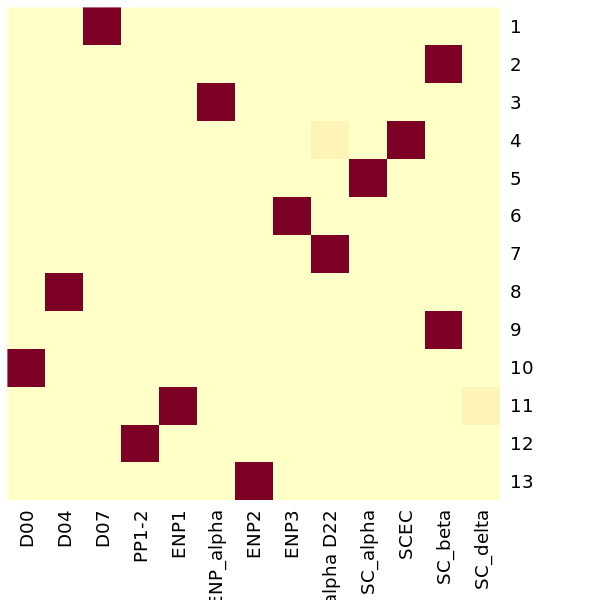

In [7]:
options(repr.plot.width=5, repr.plot.height=5)
reorder <- c(1, 2, 3, 8, 4, 7, 5, 6, 9, 10, 13, 11, 12)
H <- H[, reorder]
heatmap(H, Colv=NA, Rowv=NA, revC = T)

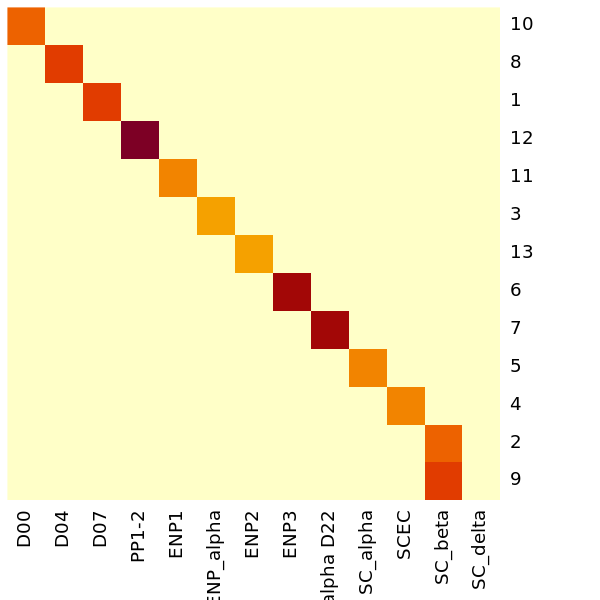

In [10]:
order<-c(10,8,1,12,11,3,13,6,7,5,4,2,9)
or<-H
rownames(or)<-c(1:13)
or<-or[order,]
heatmap(or, Colv=NA, Rowv=NA, revC = T, scale="none")

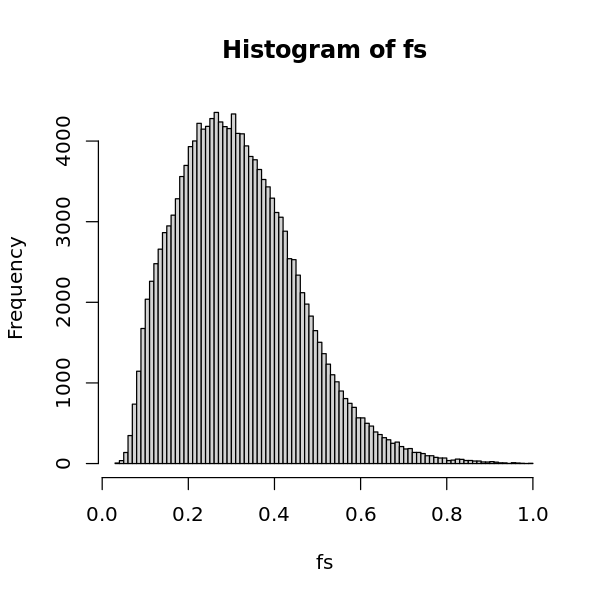

In [11]:
fs<-featureScore(nmf_result, method="kim")
hist(fs, breaks=100)

In [12]:
maxID<-apply(W, 1, which.max)

In [13]:
head(fs)
head(names(rev(sort(fs))))

chr1:9837-10430   chr1:17345-17626   chr1:28431-29829   chr1:99034-99327 
         0.2565497          0.2378249          0.2194198          0.3430911 
chr1:128426-128863 chr1:134795-135411 
         0.1768976          0.3345819

[1] "chrX:140177376-140177658" "chr5:163880292-163880586"
[3] "chr2:63093827-63094118"   "chr10:22992044-22992722" 
[5] "chr10:23630801-23631186"  "chr8:123740587-123740880"

In [14]:
class(data)
dim(data)

[1] "data.frame"

[1] 151791     13

In [15]:
head(data)
data1<-data[rev(sort(fs)),]
print(data1)
fs<-fs[rownames(data)]
maxID<-maxID[rownames(data)]

,D00,D04,D07,ENP1,ENP2,ENP3,ENP.Alpha,PP1_2,SC.Alpha_D22,SC.Alpha,SC.Beta,SC.Delta,SC.EC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:9837-10430,60.1169636,47.512042,36.513989,23.3103519,25.4898410,47.045878,15.571383,51.06999,534.263652,19.117123,185.9242830,0.9256117,5.7022433
chr1:17345-17626,1.3462763,15.262441,2.961958,3.0704387,8.0155951,18.737143,9.436199,20.05774,16.098847,1.198621,4.4489666,0.2397652,45.6635600
chr1:28431-29829,16.4810402,13.124451,13.666617,146.1233921,5.6543603,97.818373,10.366851,36.40663,67.330999,22.083062,43.8988407,3.2526072,21.4651292
chr1:99034-99327,0.6691837,4.102695,3.794708,0.6707853,0.5993106,2.446932,2.637417,36.53085,1.884787,2.774989,0.7404894,0.0000000,0.8015595
chr1:128426-128863,2.0812420,4.257814,2.412488,8.8171547,6.6918369,10.256738,5.421012,10.73256,1.198621,1.112242,1.4385912,4.5663560,1.3462763
chr1:134795-135411,4.4489666,16.304034,196.353308,6.1928708,13.1811992,13.513931,7.237463,52.10137,34.128368,9.846469,20.0577446,2.0123559,8.0906925


                       D00      D04      D07     ENP1     ENP2     ENP3
chr1:9837-10430   60.11696 47.51204 36.51399 23.31035 25.48984 47.04588
chr1:9837-10430.1 60.11696 47.51204 36.51399 23.31035 25.48984 47.04588
chr1:9837-10430.2 60.11696 47.51204 36.51399 23.31035 25.48984 47.04588
                  ENP.Alpha    PP1_2 SC.Alpha_D22 SC.Alpha  SC.Beta  SC.Delta
chr1:9837-10430    15.57138 51.06999     534.2637 19.11712 185.9243 0.9256117
chr1:9837-10430.1  15.57138 51.06999     534.2637 19.11712 185.9243 0.9256117
chr1:9837-10430.2  15.57138 51.06999     534.2637 19.11712 185.9243 0.9256117
                     SC.EC
chr1:9837-10430   5.702243
chr1:9837-10430.1 5.702243
chr1:9837-10430.2 5.702243


In [16]:
dim(data1)

[1]  3 13

In [17]:
order<-c(10,8,1,12,11,3,13,6,7,5,4,2,9)
i=1
data.sort<-data[names(maxID[maxID==order[i]]),]
for(i in 2:(length(order))){
   data.sort<-rbind(data.sort,data[names(maxID[maxID==order[i]]),])
   }

In [18]:
print(data)

                                  D00          D04          D07         ENP1
chr1:9837-10430            60.1169636   47.5120420   36.5139890   23.3103519
chr1:17345-17626            1.3462763   15.2624411    2.9619575    3.0704387
chr1:28431-29829           16.4810402   13.1244514   13.6666166  146.1233921
chr1:99034-99327            0.6691837    4.1026954    3.7947084    0.6707853
chr1:128426-128863          2.0812420    4.2578140    2.4124876    8.8171547
chr1:134795-135411          4.4489666   16.3040338  196.3533081    6.1928708
chr1:136731-137154          2.8718868    7.0473157    6.7078529    0.5993106
chr1:151472-151753          0.9256117    0.8772682    4.0077976    2.0075511
chr1:155903-156197          0.7192956   45.6635600    0.8077658    0.6937473
chr1:180642-181023          2.1684048    4.6954970    2.6968975    0.6673450
chr1:198946-200369          7.0181456   24.8483449   28.7748987   12.3080862
chr1:268948-269241         18.2654240    0.5385105    4.8562313    0.1851223

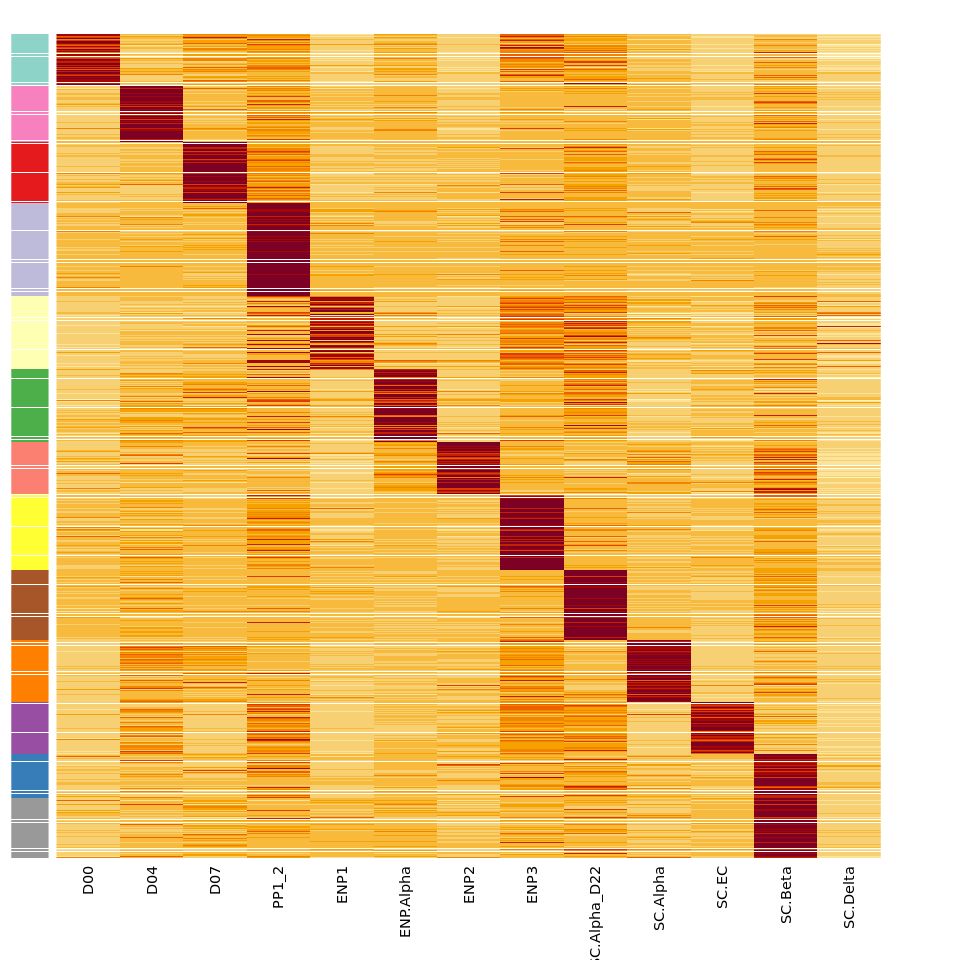

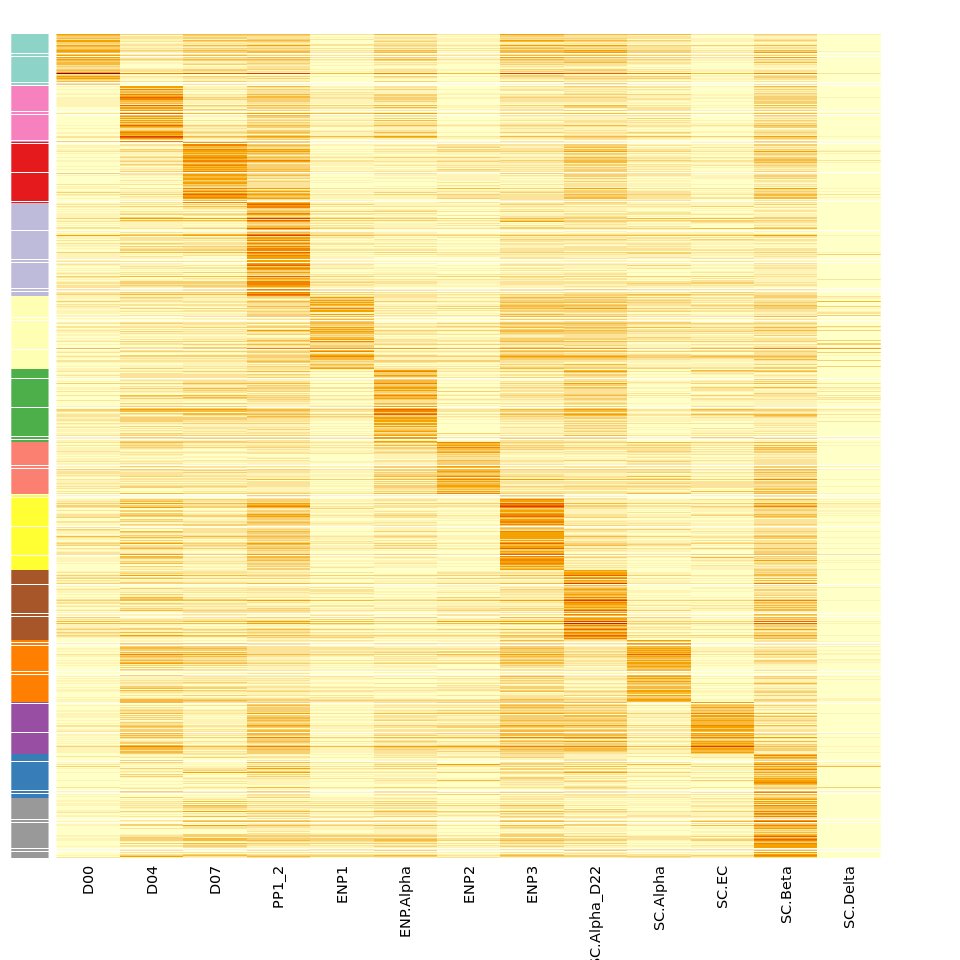

In [19]:
options(repr.plot.width=8, repr.plot.height=8)
sample<-sort(sample(c(1:dim(data.sort)[1]), 50000)) 
#sample_size <- min(50000, dim(data.sort)[1])
#sample <- sort(sample(c(1:dim(data.sort)[1]), sample_size))

## subsample heatmap
data.sort.sub<-as.matrix(data.sort[sample,])
maxID.sub<-maxID[rownames(data.sort.sub)]

data.sort.sub <- data.sort.sub[, reorder]

## define module color
library(RColorBrewer)
col<-c(brewer.pal(name="Set1", n=9), brewer.pal(name="Set3", n=8), brewer.pal(name="Set2", n=7))

heatmap(data.sort.sub, Colv=NA, Rowv=NA, scale="row", revC =  T, labRow = F, RowSideColors =  col[maxID.sub])
data.sort.sublog<-log10(data.sort.sub+1)
maxcpm<-4
data.sort.sublog[data.sort.sublog>maxcpm]<-maxcpm
heatmap(data.sort.sublog, Colv=NA, Rowv=NA, scale="none", revC =  T, labRow = F, RowSideColors =  col[maxID.sub])

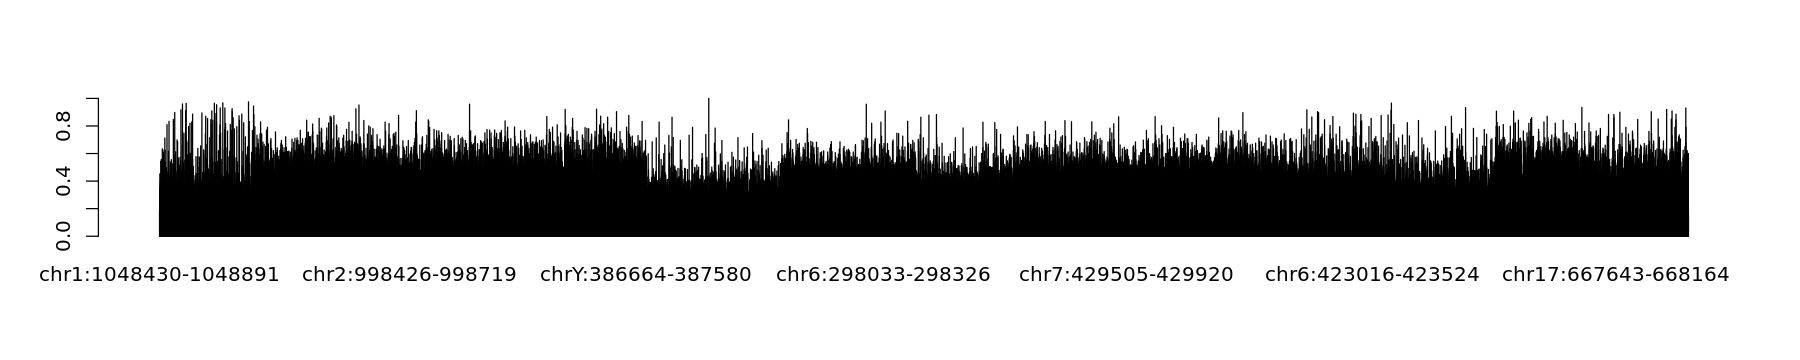

In [22]:
options(repr.plot.width=15, repr.plot.height=3)
barplot(fs[rownames(data.sort.sub)], xlab = NA)

In [23]:
table(maxID.sub);length(table(maxID.sub))

maxID.sub
   1    2    3    4    5    6    7    8    9   10   11   12   13 
3672 2717 4417 3116 3770 4558 4238 3429 3632 3140 4400 5684 3227 

[1] 13

In [24]:
saveRDS(nmf_result, file = "nmfDNAac.rds")